In [2]:
# Install necessary libraries
!pip install gensim wordcloud matplotlib nltk PyMuPDF pandas networkx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.0/20.0 MB 65.2 MB/s eta 0:00:00


In [3]:
import os
import csv
import glob
import fitz  # PyMuPDF
import nltk
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
from gensim.models import Word2Vec, Doc2Vec
from gensim.models.doc2vec import TaggedDocument
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from wordcloud import WordCloud
from collections import Counter
from itertools import islice


In [4]:
import os
import glob
import fitz  # PyMuPDF for PDF reading
from gensim.models import Word2Vec, Doc2Vec
from gensim.models.doc2vec import TaggedDocument
from collections import Counter
import csv
import string
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import networkx as nx
import gc  # Garbage collector


In [5]:
# Download NLTK data
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
nltk.download('wordnet')

folder_path = "/content/drive/MyDrive/content"  # Updated folder path
pdf_files = [f for f in os.listdir(folder_path) if f.endswith(".pdf")]

print("PDFs found:", len(pdf_files))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


PDFs found: 143


In [6]:
def extract_text_from_pdfs(folder_path):
    pdf_files = glob.glob(f"{folder_path}/*.pdf")
    pdf_texts = []
    for pdf_file in pdf_files:
        with fitz.open(pdf_file) as doc:
            text = ""
            for page in doc:
                text += page.get_text()
            pdf_texts.append(text)
    return pdf_files, pdf_texts

pdf_files, pdf_texts = extract_text_from_pdfs(folder_path)
print(f"Extracted text from {len(pdf_files)} PDFs.")

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words("english"))
punctuations = set(string.punctuation)

cleaned_lemmatized_words_per_pdf = []


MuPDF error: format error: cmsOpenProfileFromMem failed

MuPDF error: format error: cmsOpenProfileFromMem failed

Extracted text from 143 PDFs.


In [7]:
import nltk
nltk.download('punkt')
nltk.download('punkt', force=True)
nltk.download('all')
import nltk.data
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    

In [8]:
def extract_text_from_pdfs(pdf_batch):
    pdf_texts = []
    for pdf_file in pdf_batch:
        with fitz.open(os.path.join(folder_path, pdf_file)) as doc:
            text = ""
            for page in doc:
                text += page.get_text("text")  # Ensure text extraction
            pdf_texts.append(text)

    # Debugging: Print sample text from PDFs
    if pdf_texts:
        print("Sample extracted text:", pdf_texts[0][:500])  # Print first 500 chars
    else:
        print("No text extracted from PDFs.")

    return pdf_texts


def process_batch(batch):
    lemmatizer = WordNetLemmatizer()
    stop_words = set(stopwords.words("english"))
    punctuations = set(string.punctuation)
    cleaned_lemmatized_words_per_pdf = []

    for text in batch:
        if not text.strip():
            print("Warning: Empty text after extraction.")
            continue

        sentences = sent_tokenize(text)
        lemmatized_words = []

        for sentence in sentences:
            words = word_tokenize(sentence.lower())

            # Debugging: Print tokenized words
            print("Tokenized words:", words[:10])  # Print first 10 words

            words = [word for word in words if word.isalpha() and word not in stop_words and word not in punctuations]
            lemmatized_words.extend([lemmatizer.lemmatize(word) for word in words])

        if lemmatized_words:
            cleaned_lemmatized_words_per_pdf.append(lemmatized_words)
        else:
            print("Warning: No words after processing this PDF.")

    return cleaned_lemmatized_words_per_pdf



batch_size = int(input("Enter batch size: "))
total_batches = len(pdf_files) // batch_size + (1 if len(pdf_files) % batch_size != 0 else 0)
final_words = []

with open("lemmatized_clean.csv", "w", encoding="utf-8", newline="") as f:
    writer = csv.writer(f)
    writer.writerow(["PDF Number", "Lemmatized Text"])
    pdf_counter = 1

    for batch_num in range(total_batches):
        batch_files = pdf_files[batch_num * batch_size:(batch_num + 1) * batch_size]
        print(f"Processing batch {batch_num + 1}/{total_batches} with {len(batch_files)} PDFs")

        pdf_texts = extract_text_from_pdfs(batch_files)
        batch_words = process_batch(pdf_texts)

        for words in batch_words:
            writer.writerow([pdf_counter, " ".join(words)])
            final_words.extend(words)
            pdf_counter += 1

Streaming output truncated to the last 5000 lines.
Tokenized words: ['during', 'this', 'phase', ',', 'the', 'cow', 'and', 'her', 'udder', 'prepares']
Tokenized words: ['due', 'to', 'the', 'good', 'amount', 'of', 'milk', 'they', 'produce', ',']
Tokenized words: ['preparation', 'for', 'dry', 'off', 'should', 'begin', 'at', 'least', 'two', 'weeks']
Tokenized words: ['reducing', 'the', 'energy', 'content', 'of', 'the', 'diet', 'and', 'feeding', 'primarily']
Tokenized words: ['length', 'of', 'dry', 'period', 'animals', 'should', 'be', 'dry', 'for', 'around']
Tokenized words: ['if', 'animals', 'have', 'prolonged', 'dry', 'periods', ',', 'they', 'run', 'the']
Tokenized words: ['procedure', 'for', 'drying', 'off', 'reduce', 'concentrate', 'feeding', 'on', 'a', 'tapering']
Tokenized words: ['do', 'not', 'restrict', 'water', 'access', 'check', 'dry', 'cows', 'visually', 'on']
Tokenized words: ['61', 'd.', 'normal', 'calving', '&', 'dystocia', 'yy', 'calving', 'usually', 'takes']
Tokenized words:

In [9]:
# Generate WordCloud
def generate_wordcloud(text):
    if not text.strip():
        print("No words to generate WordCloud.")
        return

    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title("WordCloud of Processed Text")
    plt.show()



🔹 Top Unigrams:
            Word  Frequency
12         maize      13334
13       disease       8590
18         plant       6352
335         leaf       6082
213           et       4279
49          crop       3205
170         corn       2543
510   resistance       2499
214           al       2328
87           rot       2324
37           may       2313
1229        seed       2284
314        virus       2097
192        yield       2057
178   production       1867
116         also       1816
499         spot       1779
86           ear       1748
71      pathogen       1745
328        stalk       1638


<ipython-input-10-73a73d889585>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Frequency", y="Word", data=df_unigram, palette="Blues_r")


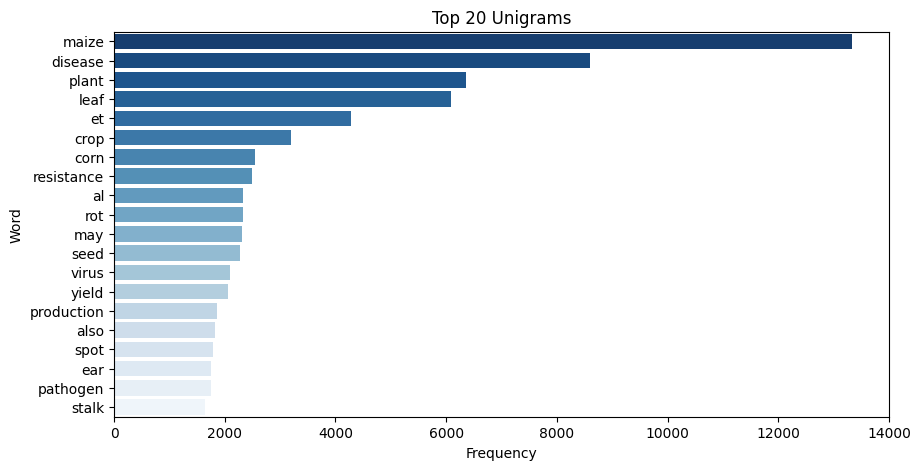


🔹 Top Bigrams:
                  Bigram  Frequency
292                et al       2273
1103           leaf spot       1230
571          leaf blight       1146
543            stalk rot       1075
12         maize disease        729
2736           gray leaf        621
18         plant disease        621
229              zea may        592
113              ear rot        571
8247          maize leaf        534
1216       disease maize        515
5356        downy mildew        507
3757         maize plant        496
459           yield loss        488
3273         inbred line        478
242218           farr et        370
1215        leaf disease        368
288     maize production        363
12109       mosaic virus        334
570            corn leaf        327


<ipython-input-10-73a73d889585>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Frequency", y="Bigram", data=df_bigram, palette="Greens_r")


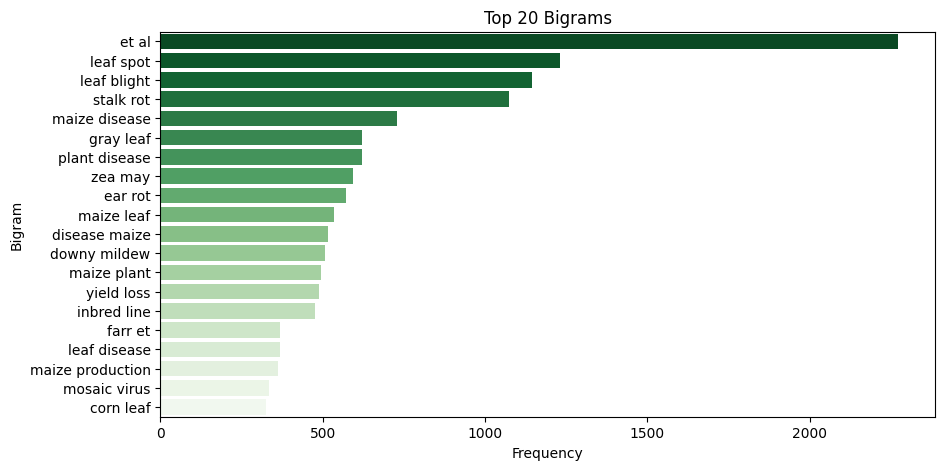

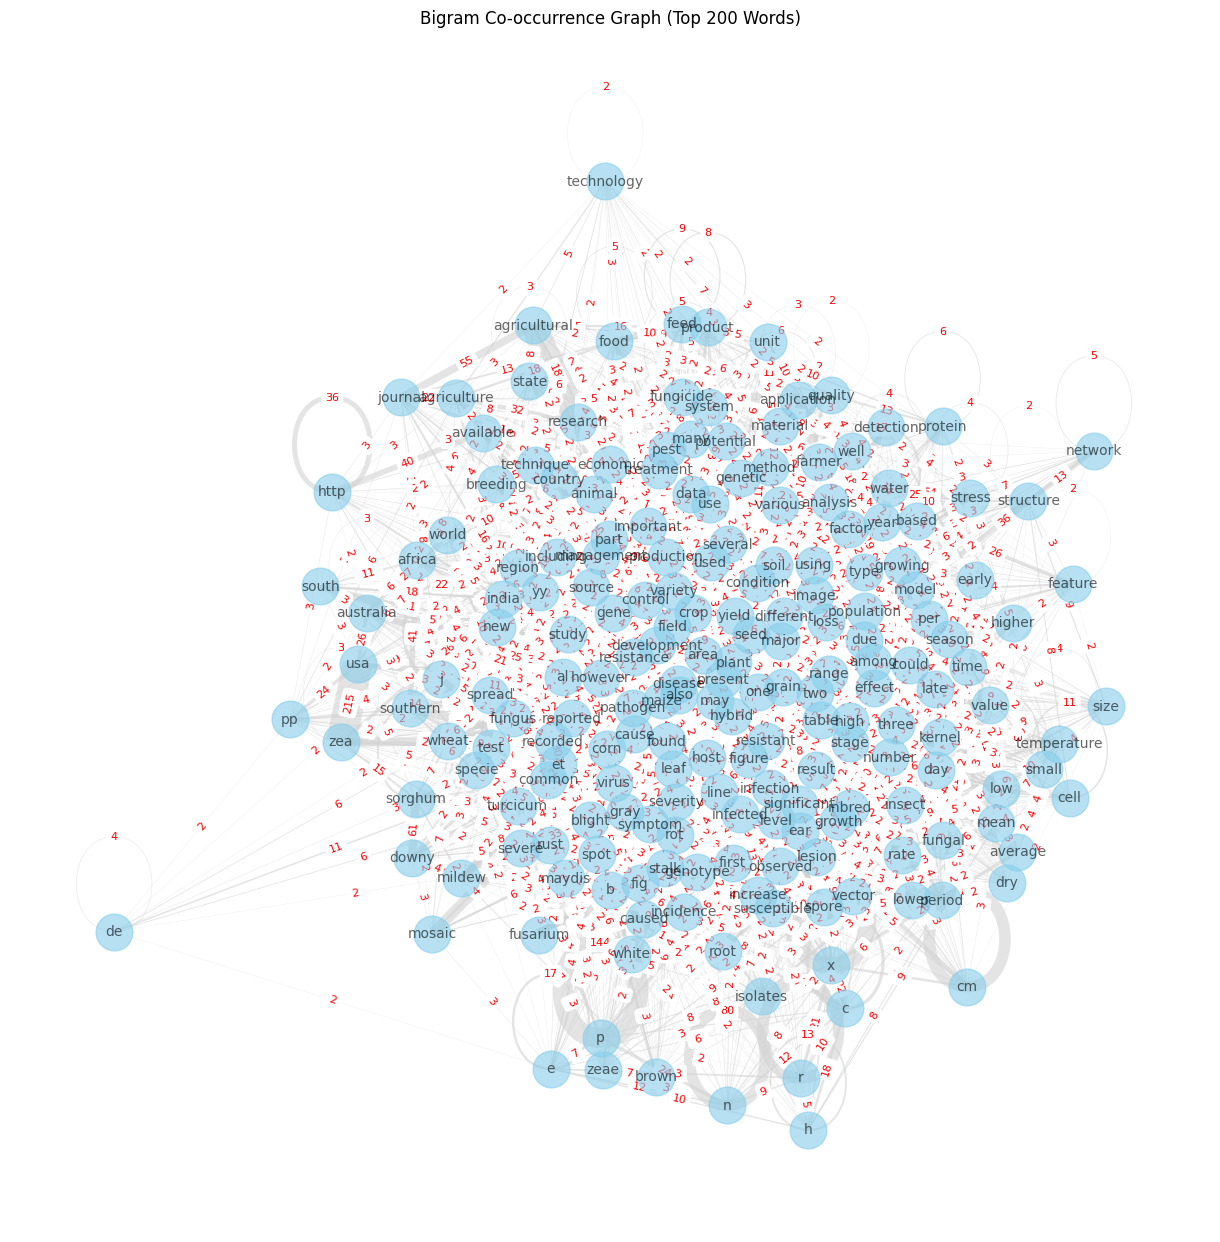

In [10]:
from nltk import bigrams
import seaborn as sns

# Unigram Frequency Table
unigram_counts = Counter(final_words)
df_unigram = pd.DataFrame(unigram_counts.items(), columns=["Word", "Frequency"])
df_unigram = df_unigram.sort_values(by="Frequency", ascending=False).head(20)

print("\n🔹 Top Unigrams:")
print(df_unigram)

# Plot Unigram Frequencies
plt.figure(figsize=(10, 5))
sns.barplot(x="Frequency", y="Word", data=df_unigram, palette="Blues_r")
plt.title("Top 20 Unigrams")
plt.show()

# Bigram Processing
bigrams_list = list(bigrams(final_words))
bigram_counts = Counter(bigrams_list)

# Bigram Frequency Table
df_bigram = pd.DataFrame(bigram_counts.items(), columns=["Bigram", "Frequency"])
df_bigram["Bigram"] = df_bigram["Bigram"].apply(lambda x: " ".join(x))
df_bigram = df_bigram.sort_values(by="Frequency", ascending=False).head(20)

print("\n🔹 Top Bigrams:")
print(df_bigram)

# Plot Bigram Frequencies
plt.figure(figsize=(10, 5))
sns.barplot(x="Frequency", y="Bigram", data=df_bigram, palette="Greens_r")
plt.title("Top 20 Bigrams")
plt.show()

top_words = [word for word, _ in unigram_counts.most_common(200)]
filtered_bigrams = {pair: freq for pair, freq in bigram_counts.items() if pair[0] in top_words and pair[1] in top_words}

G = nx.Graph()
for (w1, w2), freq in filtered_bigrams.items():
    if freq > 1:
        G.add_edge(w1, w2, weight=freq)

plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G, k=0.5)
nx.draw(G, pos, edge_color='lightgray', node_color='skyblue', with_labels=True, font_size=10, node_size=700,
        width=[G[u][v]['weight'] * 0.1 for u, v in G.edges()], alpha=0.6)
nx.draw_networkx_edge_labels(G, pos, edge_labels={(w1, w2): freq for (w1, w2), freq in filtered_bigrams.items() if freq > 1},
                              font_size=8, font_color='red')
plt.title("Bigram Co-occurrence Graph (Top 200 Words)")
plt.show()



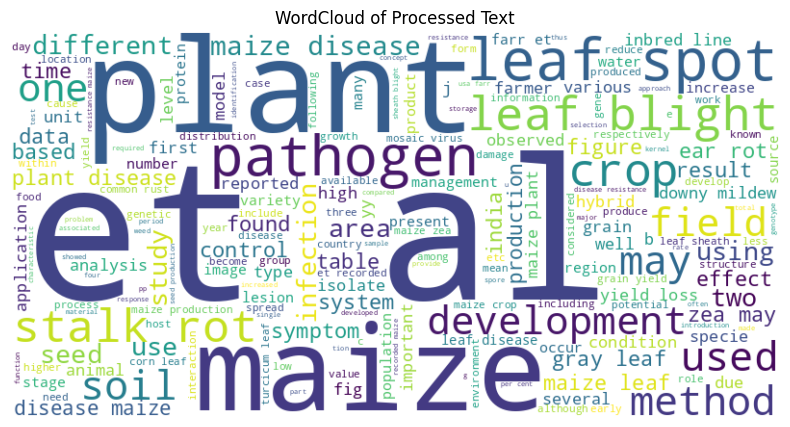

In [22]:
# Generate Word Cloud
all_words = " ".join(final_words)
generate_wordcloud(all_words)
